In [1]:
# from sklearn import preprocessing

# [data['Amount']] = preprocessing.normalize([data['Amount']], norm='l2')
# [data['Time']] = preprocessing.normalize([data['Time']], norm='l2')
import pandas as pd
import matplotlib.pyplot as plt

# Load the credit card data
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# coloca em ordem no df
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

data.head()

# Amount and Time are Scaled!

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

X = data.drop('Class', axis=1)
y = data['Class']

# extraindo os dados de treino (70%)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values





# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 50)



print('Label Distributions: [Fraud Non-Fraud]')
print('Train: ')
print(train_counts_label/ len(original_ytrain))
print(train_counts_label)
print('Test: ')
print(test_counts_label/ len(original_ytest))
print(test_counts_label)

original_Xtrain.head()

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [249927 214082 106005 ...  85418  29062  17677] Test: [186882 165754 235285 ... 183868  45011 150527]
--------------------------------------------------
Label Distributions: [Fraud Non-Fraud]
Train: 
[0.99827451 0.00172549]
[199020    344]
Test: 
[0.99826785 0.00173215]
[85295   148]


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
249927,-0.207783,0.821767,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,...,0.329703,-0.038329,-0.231385,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758
214082,1.788584,0.644192,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,...,-0.016297,-0.030437,0.281190,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755
106005,17.892685,-0.175214,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,...,-1.087435,2.189260,0.346463,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833
58619,-0.244673,-0.425510,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,...,0.929925,0.225957,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309
191638,-0.244673,0.524654,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,...,-0.458141,0.154309,0.167939,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344


In [3]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Relation fraud non-fraud in the CV set: 343 x 343
Relação treino teste 686 x 300
Relação treino teste 0.6957403651115619 x 0.30425963488843816
Epoch 1/1000
22/22 [==============================] - 1s 12ms/step - loss: 0.6097 - accuracy: 0.6501 - val_loss: 0.6283 - val_accuracy: 0.7800
Epoch 2/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4772 - accuracy: 0.8367 - val_loss: 0.4985 - val_accuracy: 0.9200
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.9023 - val_loss: 0.3845 - val_accuracy: 0.9533
Epoch 4/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3188 - accuracy: 0.9140 - val_loss: 0.2857 - val_accuracy: 0.9767
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2636 - accuracy: 0.9184 - val_loss: 0.2400 - val_accuracy: 0.9733
Epoch 6/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2264 - accuracy: 0.9271 - val_loss: 0.1908 - val_accuracy: 0.9767
Epoc

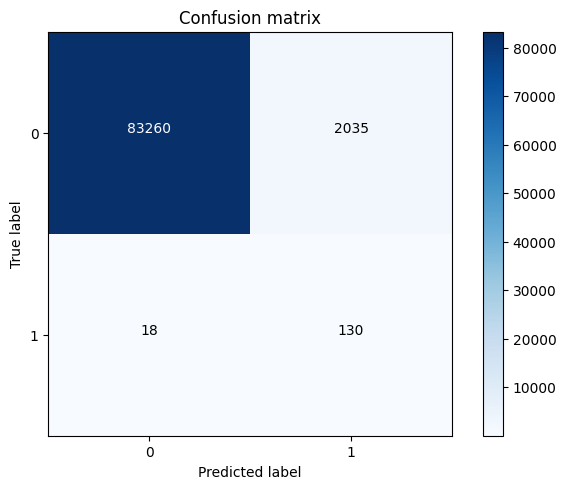

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have the data loaded into original_Xtrain, original_ytrain, original_Xtest, and original_ytest

# Initialize StratifiedShuffleSplit for cross-validation
sss = StratifiedShuffleSplit(n_splits=7, test_size=0.0015, random_state=42)

# Initialize the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=30))  # Update input_dim to 29
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize scaler
scaler = RobustScaler()
history_list = []

# Initialize an array to store accuracy scores for each fold
accuracy_scores = []

for train_val_index, test_val_index in sss.split(original_Xtrain, original_ytrain):
    X_train, X_val = original_Xtrain.iloc[train_val_index], original_Xtrain.iloc[test_val_index]
    y_train, y_val = original_ytrain.iloc[train_val_index], original_ytrain.iloc[test_val_index]

    train_val_data = X_train
    train_val_data = train_val_data.assign(Class=y_train)

    fraud_df = train_val_data.loc[train_val_data['Class'] == 1]
    non_fraud_df = train_val_data.loc[train_val_data['Class'] == 0].sample(len(fraud_df))

    print(f'Relation fraud non-fraud in the CV set: {len(fraud_df)} x {len(non_fraud_df)}')

    print(f'Relação treino teste {len(non_fraud_df)+len(fraud_df)} x {len(y_val)}')
    print(f'Relação treino teste {(len(non_fraud_df)+len(fraud_df))/(len(non_fraud_df)+len(fraud_df)+len(y_val))} x {len(y_val)/(len(non_fraud_df)+len(fraud_df)+len(y_val))}')
        
        
        
    X_train_resampled = pd.concat([fraud_df, non_fraud_df]).drop('Class', axis=1)
    y_train_resampled = pd.concat([fraud_df, non_fraud_df])['Class']
    
    

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_val_scaled = scaler.transform(X_val)

    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    history = model.fit(x=X_train_scaled, y=y_train_resampled, epochs=1000, validation_data=(X_val_scaled, y_val),
                        callbacks=[early_stop])

    history_list.append(history.history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_scaled, y_val)
    print(f"Validation Accuracy: {accuracy}")
    accuracy_scores.append(accuracy)

# Print the average accuracy across all folds
print(f"Average Accuracy Neural Network: {np.mean(accuracy_scores)}")

# Evaluate the model on the test set
X_test_scaled = scaler.transform(original_Xtest)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(original_ytest, y_pred)

# Print the classification report
print("\nClassification Report:\n", classification_report(original_ytest, y_pred))
print("Recall: ", recall_score(original_ytest, y_pred))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix')
plt.show()



2671/2671 [==============================] - 3s 1ms/step


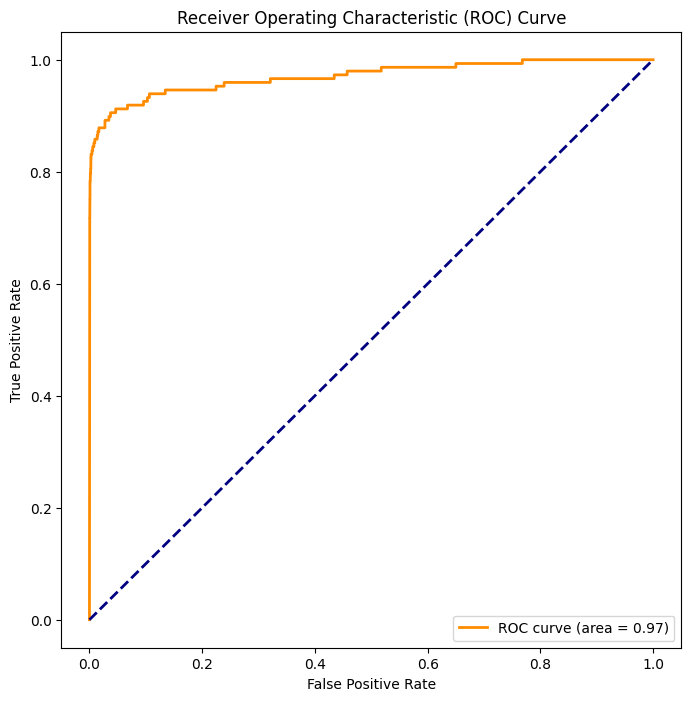

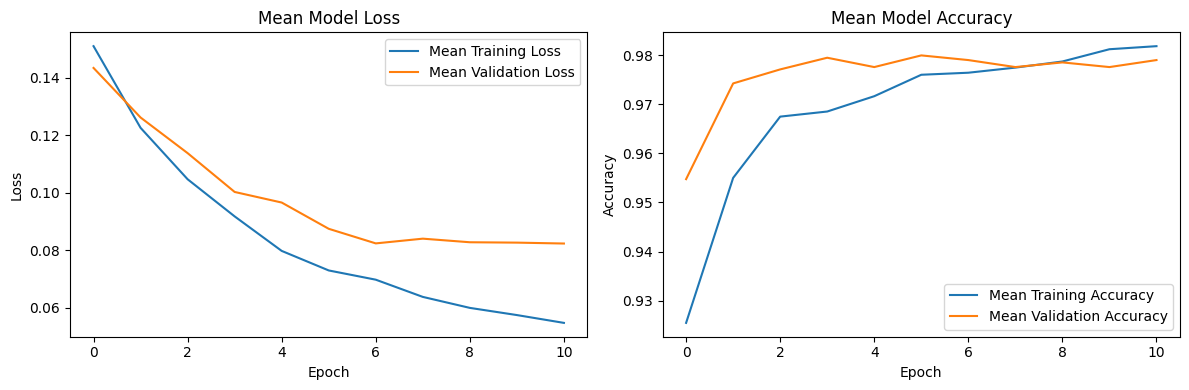

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the following functions available
# If not, implement or import them from scikit-learn

# Assuming model is already trained and you have X_test and y_test
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)


# Plot ROC curve
fpr, tpr, _ = roc_curve(original_ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the minimum length of histories
min_length = min(len(history['loss']) for history in history_list)

# Truncate or pad histories to have the same length
truncated_histories = []
for history in history_list:
    truncated_history = {
        'loss': history['loss'][:min_length],
        'val_loss': history['val_loss'][:min_length],
        'accuracy': history['accuracy'][:min_length],
        'val_accuracy': history['val_accuracy'][:min_length]
    }
    truncated_histories.append(truncated_history)

# Calculate mean values for each epoch
mean_loss = np.mean([history['loss'] for history in truncated_histories], axis=0)
mean_val_loss = np.mean([history['val_loss'] for history in truncated_histories], axis=0)
mean_accuracy = np.mean([history['accuracy'] for history in truncated_histories], axis=0)
mean_val_accuracy = np.mean([history['val_accuracy'] for history in truncated_histories], axis=0)

# Plot mean training/validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(mean_loss, label='Mean Training Loss')
plt.plot(mean_val_loss, label='Mean Validation Loss')
plt.title('Mean Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(mean_accuracy, label='Mean Training Accuracy')
plt.plot(mean_val_accuracy, label='Mean Validation Accuracy')
plt.title('Mean Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Class distribution after oversampling: 109461 x 109461
Relação treino teste 218922 x 89714
Relação treino teste 0.7093210124548012 x 0.2906789875451989
Epoch 1/500
6842/6842 [==============================] - 19s 3ms/step - loss: 0.0393 - accuracy: 0.9882 - val_loss: 0.0100 - val_accuracy: 0.9979
Epoch 2/500
6842/6842 [==============================] - 17s 2ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0095 - val_accuracy: 0.9986
Epoch 3/500
6842/6842 [==============================] - 17s 3ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0113 - val_accuracy: 0.9985
Epoch 4/500
6842/6842 [==============================] - 18s 3ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0108 - val_accuracy: 0.9989
Epoch 5/500
6842/6842 [==============================] - 19s 3ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0098 - val_accuracy: 0.9989
Epoch 6/500
6842/6842 [==============================] - 18s 3ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.

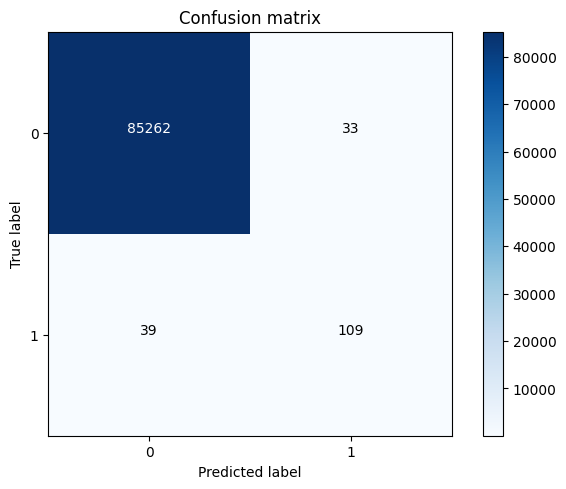

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import RandomOverSampler

# Assuming you have the data loaded into original_Xtrain, original_ytrain, original_Xtest, and original_ytest

# Initialize StratifiedShuffleSplit for cross-validation
sss = StratifiedShuffleSplit(n_splits=7, test_size=0.45, random_state=42)

# Initialize the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=30))  # Update input_dim to 30
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize scaler
scaler = RobustScaler()

# Initialize an array to store accuracy scores for each fold
accuracy_scores = []

for train_val_index, test_val_index in sss.split(original_Xtrain, original_ytrain):
    Xtrain, X_val = original_Xtrain.iloc[train_val_index], original_Xtrain.iloc[test_val_index]
    ytrain, y_val = original_ytrain.iloc[train_val_index], original_ytrain.iloc[test_val_index]

    # Use RandomOverSampler to oversample the minority class
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(Xtrain, ytrain)

    print(f"Class distribution after oversampling: {len(y_train_resampled[y_train_resampled==0])} x {len(y_train_resampled[y_train_resampled==1])}")

    print(f'Relação treino teste {len(y_train_resampled)} x {len(y_val)}')
    print(f'Relação treino teste {(len(y_train_resampled))/(len(y_train_resampled)+len(y_val))} x {len(y_val)/(len(y_train_resampled)+len(y_val))}')
        
        
    train_val_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name='Class')], axis=1)

    fraud_df = train_val_data.loc[train_val_data['Class'] == 1]
    non_fraud_df = train_val_data.loc[train_val_data['Class'] == 0].sample(len(fraud_df))

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_val_scaled = scaler.transform(X_val)

    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    history = model.fit(x=X_train_scaled, y=y_train_resampled, epochs=500, validation_data=(X_val_scaled, y_val),
                        callbacks=[early_stop])

    history_list.append(history.history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_scaled, y_val)
    print(f"Validation Accuracy: {accuracy}")
    accuracy_scores.append(accuracy)

# Print the average accuracy across all folds
print(f"Average Accuracy Neural Network: {np.mean(accuracy_scores)}")

# Evaluate the model on the test set
X_test_scaled = scaler.transform(original_Xtest)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(original_ytest, y_pred)

# Print the classification report
print("\nClassification Report:\n", classification_report(original_ytest, y_pred))
print("Recall: ", recall_score(original_ytest, y_pred))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix')
plt.show()



2671/2671 [==============================] - 4s 1ms/step


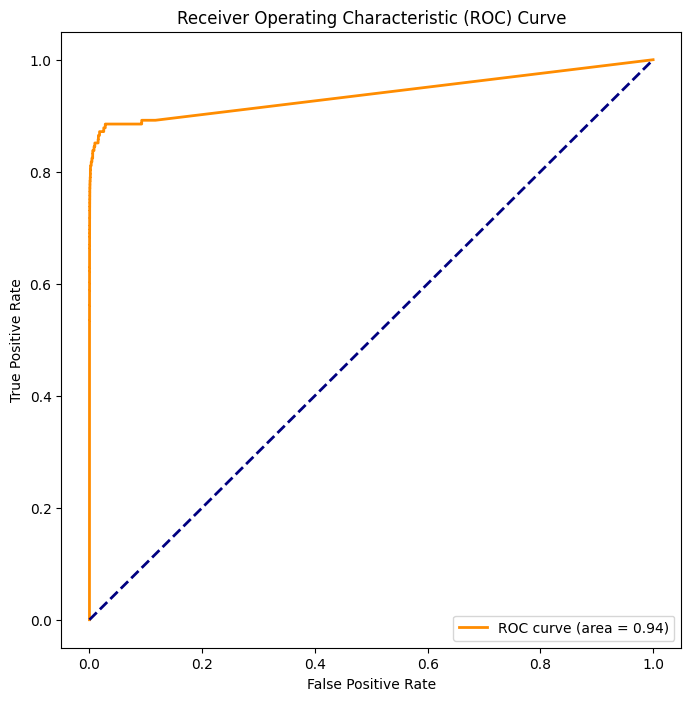

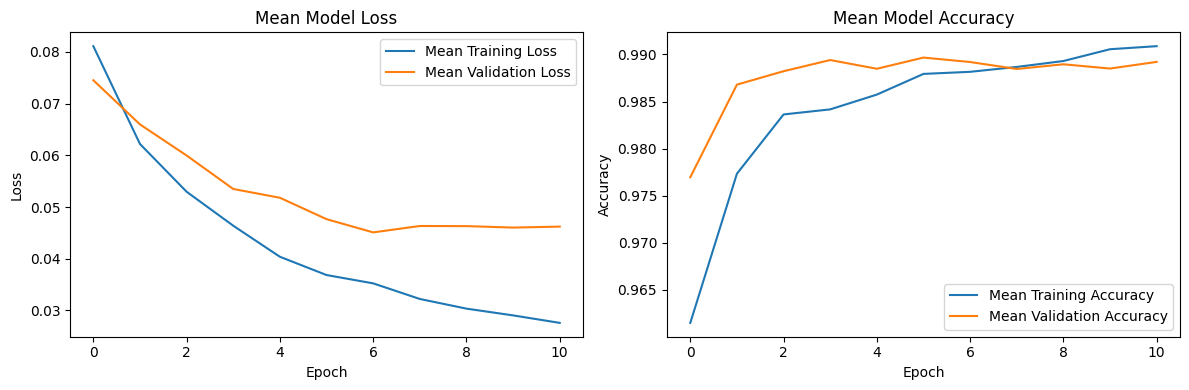

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the following functions available
# If not, implement or import them from scikit-learn

# Assuming model is already trained and you have X_test and y_test
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)


# Plot ROC curve
fpr, tpr, _ = roc_curve(original_ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the minimum length of histories
min_length = min(len(history['loss']) for history in history_list)

# Truncate or pad histories to have the same length
truncated_histories = []
for history in history_list:
    truncated_history = {
        'loss': history['loss'][:min_length],
        'val_loss': history['val_loss'][:min_length],
        'accuracy': history['accuracy'][:min_length],
        'val_accuracy': history['val_accuracy'][:min_length]
    }
    truncated_histories.append(truncated_history)

# Calculate mean values for each epoch
mean_loss = np.mean([history['loss'] for history in truncated_histories], axis=0)
mean_val_loss = np.mean([history['val_loss'] for history in truncated_histories], axis=0)
mean_accuracy = np.mean([history['accuracy'] for history in truncated_histories], axis=0)
mean_val_accuracy = np.mean([history['val_accuracy'] for history in truncated_histories], axis=0)

# Plot mean training/validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(mean_loss, label='Mean Training Loss')
plt.plot(mean_val_loss, label='Mean Validation Loss')
plt.title('Mean Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(mean_accuracy, label='Mean Training Accuracy')
plt.plot(mean_val_accuracy, label='Mean Validation Accuracy')
plt.title('Mean Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()